In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().values.any()

False

<AxesSubplot:>

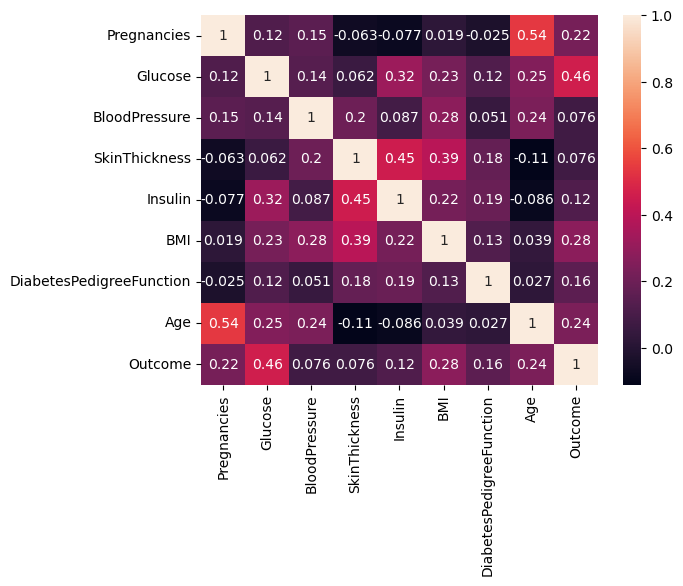

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
data = df[['Age','Pregnancies','BloodPressure','Glucose','Outcome']]
data

,Age,Pregnancies,BloodPressure,Glucose,Outcome
0,47,2,62,138,1
1,23,0,82,84,0
2,31,0,0,145,1
3,24,0,68,135,1
4,21,1,62,139,0
...,...,...,...,...,...
1995,33,2,64,75,0
1996,36,8,72,179,1
1997,42,6,78,85,0
1998,26,0,110,129,1


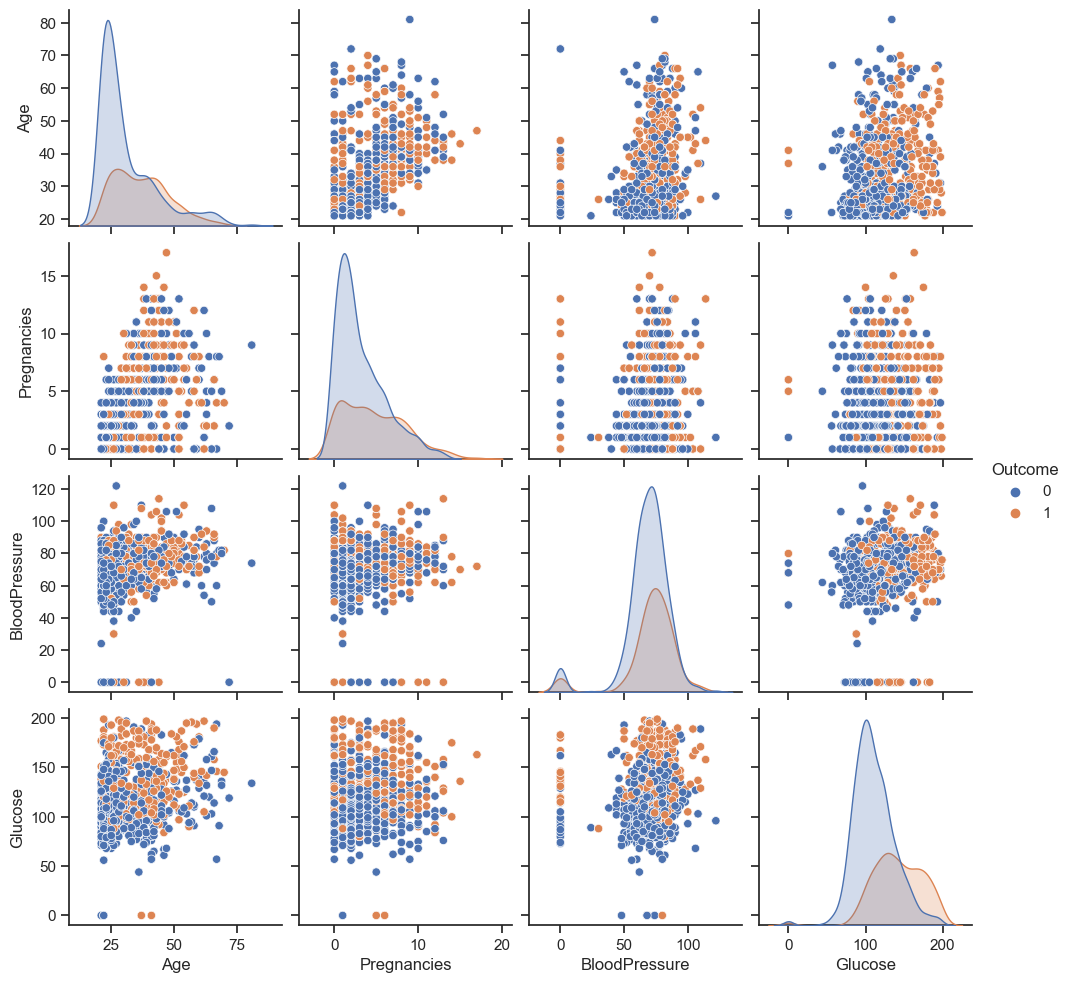

In [9]:
sns.set(style="ticks")
sns.pairplot(data, hue="Outcome")

In [10]:
d = df[['Age','BloodPressure','Outcome']]
d

,Age,BloodPressure,Outcome
0,47,62,1
1,23,82,0
2,31,0,1
3,24,68,1
4,21,62,0
...,...,...,...
1995,33,64,0
1996,36,72,1
1997,42,78,0
1998,26,110,1


In [11]:
df_norm = (d - d.min()) / (d.max() - d.min())

# print the normalized DataFrame
df_norm

,Age,BloodPressure,Outcome
0,0.433333,0.508197,1.0
1,0.033333,0.672131,0.0
2,0.166667,0.000000,1.0
3,0.050000,0.557377,1.0
4,0.000000,0.508197,0.0
...,...,...,...
1995,0.200000,0.524590,0.0
1996,0.250000,0.590164,1.0
1997,0.350000,0.639344,0.0
1998,0.083333,0.901639,1.0


<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

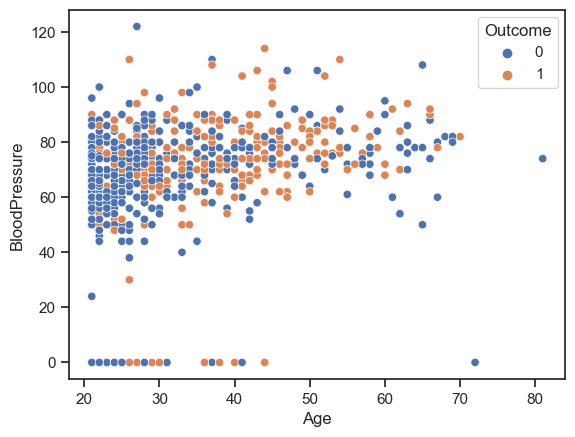

In [12]:
sns.scatterplot(x=d['Age'],y=d['BloodPressure'],hue=d['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

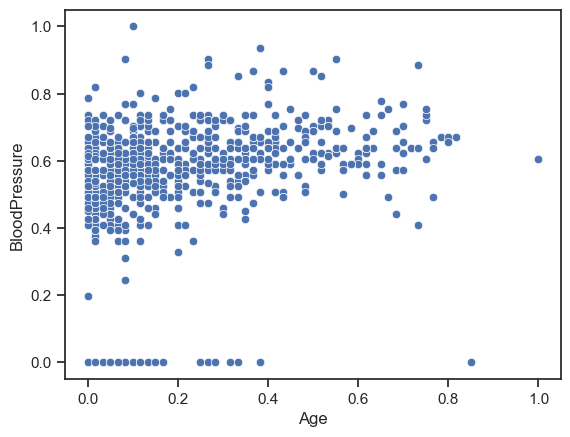

In [13]:
sns.scatterplot(x=df_norm['Age'],y=df_norm['BloodPressure'])

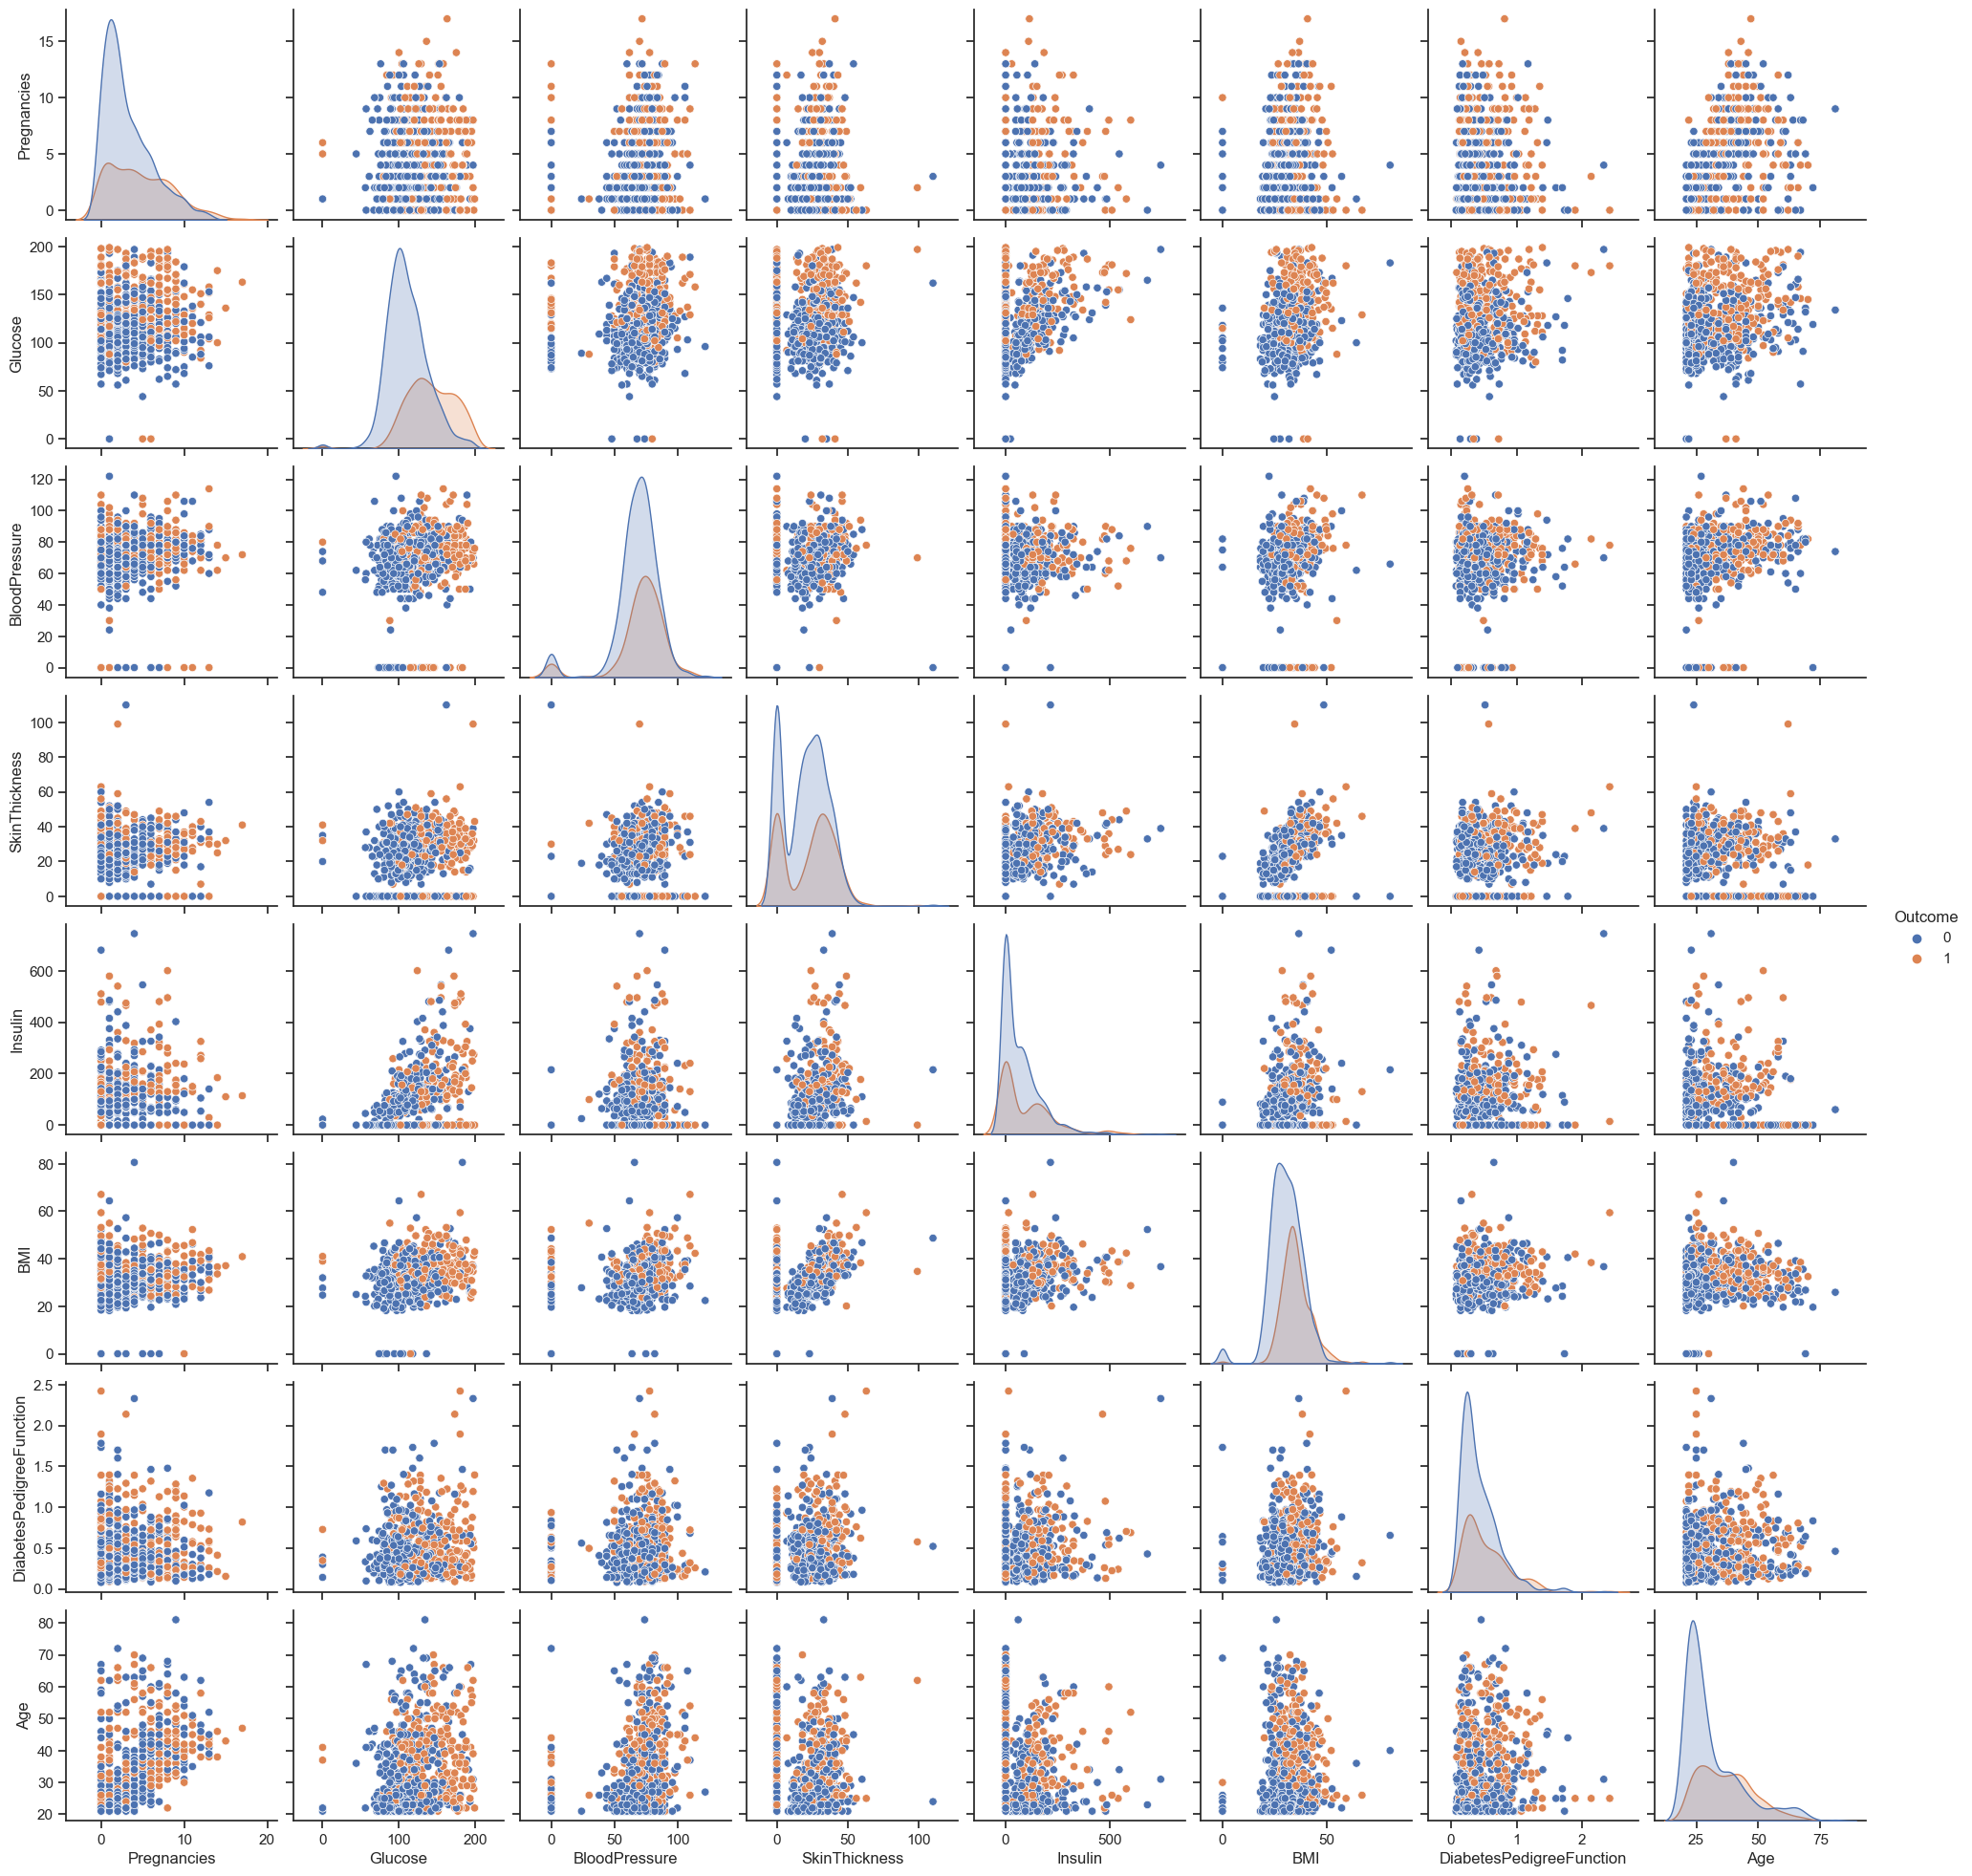

In [14]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

In [15]:
bmi_normal = df.loc[(df['BMI']>=18.5)& (df['BMI']<=24.9)]

In [16]:
bmi_under = df.loc[df['BMI']<18.5]

In [17]:
bmi_over = df.loc[df['BMI']>24.9]

In [18]:
bmi_over

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [19]:
bmi_under.count()

Pregnancies                 38
Glucose                     38
BloodPressure               38
SkinThickness               38
Insulin                     38
BMI                         38
DiabetesPedigreeFunction    38
Age                         38
Outcome                     38
dtype: int64

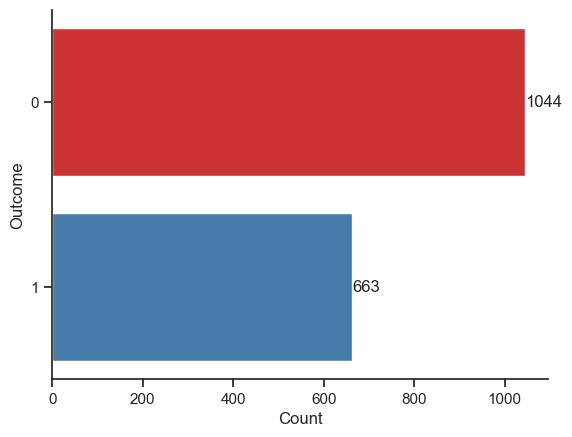

In [20]:
ax = sns.countplot(y=bmi_over['Outcome'],palette='Set1',orient = 'h')
for p in ax.patches:
    ax.text(p.get_width()+1, p.get_y()+0.5*p.get_height(),
            '{:.0f}'.format(p.get_width()), ha='left', va='center')

# add x and y labels to the plot
ax.set_xlabel('Count')
ax.set_ylabel('Outcome')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# show the plot
sns.despine()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

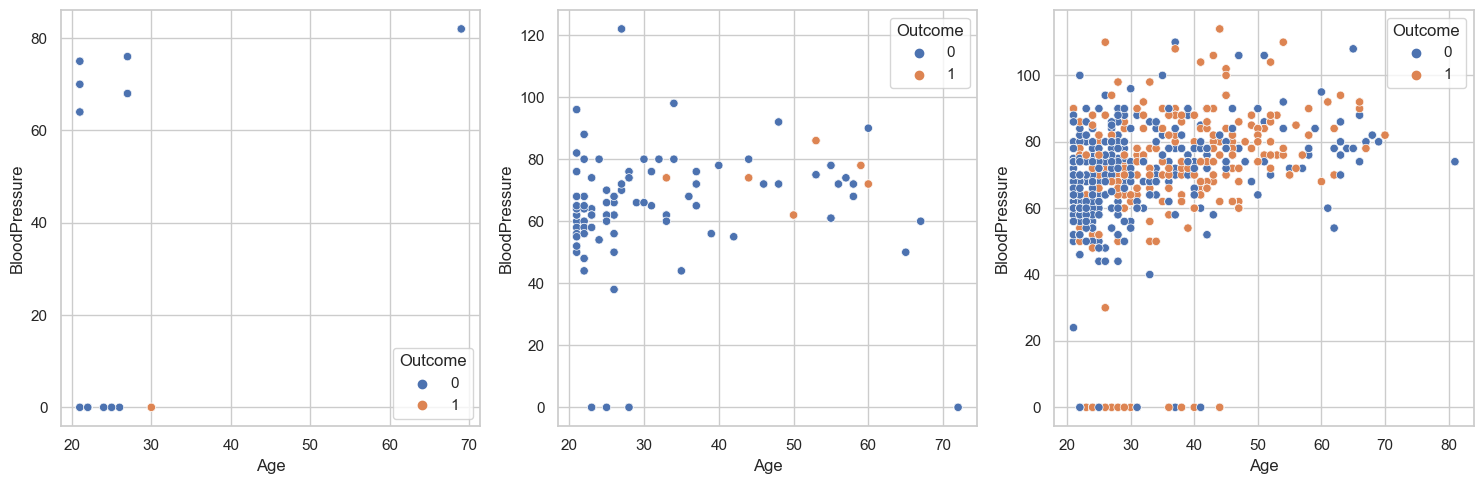

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x='Age',y='BloodPressure',hue='Outcome',data=bmi_under, ax=ax[0])
sns.scatterplot(x='Age',y='BloodPressure',hue='Outcome',data=bmi_normal, ax=ax[1])
sns.scatterplot(x='Age',y='BloodPressure',hue='Outcome',data=bmi_over, ax=ax[2])
plt.tight_layout()
plt.show()

In [23]:
BP = df['BloodPressure'].values
BP = pd.DataFrame(BP,columns=['BP'])
BP.astype(int)

,BP
0,62
1,82
2,0
3,68
4,62
...,...
1995,64
1996,72
1997,78
1998,110


In [24]:
def categorize_diastolic_bp(df):
    categorized_bp = []
    for i in df['BP']:
        if i < 80:
            categorized_bp.append("Normal")
        elif i >= 80 and i <= 89:
            categorized_bp.append("Elevated")
        elif i >= 90 and i <=99:
            categorized_bp.append("Stage 1 Hypertension")
        else:
            categorized_bp.append("Stage 2 Hypertension")
    df['Categorized BP'] = categorized_bp
    return df

In [25]:
categorize_diastolic_bp(BP)

,BP,Categorized BP
0,62,Normal
1,82,Elevated
2,0,Normal
3,68,Normal
4,62,Normal
...,...,...
1995,64,Normal
1996,72,Normal
1997,78,Normal
1998,110,Stage 2 Hypertension


In [26]:
BP['Categorized BP'].value_counts()

Normal                  1477
Elevated                 376
Stage 1 Hypertension     103
Stage 2 Hypertension      44
Name: Categorized BP, dtype: int64

In [27]:
BP['Outcome'] = df['Outcome']

In [28]:
BP

,BP,Categorized BP,Outcome
0,62,Normal,1
1,82,Elevated,0
2,0,Normal,1
3,68,Normal,1
4,62,Normal,0
...,...,...,...
1995,64,Normal,0
1996,72,Normal,1
1997,78,Normal,0
1998,110,Stage 2 Hypertension,1


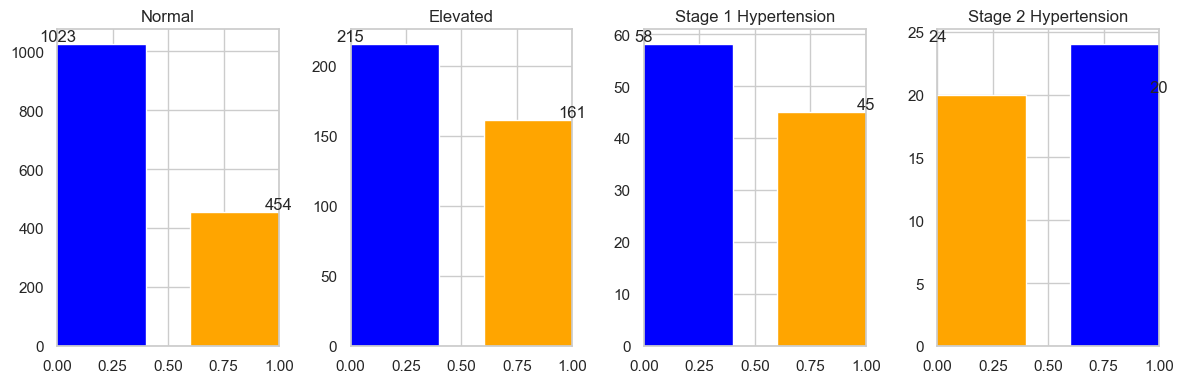

In [29]:
categories = BP['Categorized BP'].unique()

# Set up the plot
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Loop through each category
for i, category in enumerate(categories):
    # Get the count of 0's and 1's for the current category
    count = BP[BP['Categorized BP'] == category]['Outcome'].value_counts()
    
    # Plot a bar graph for the current category
    axs[i].bar(count.index, count.values, color=['blue', 'orange'])
    axs[i].set_title(category)
    
    for j, v in enumerate(count.values):
        axs[i].text(j, v, str(v), ha='center', va='bottom')
        
    axs[i].set_xlim([0, 1])

# Show the plot
plt.tight_layout()
plt.show()

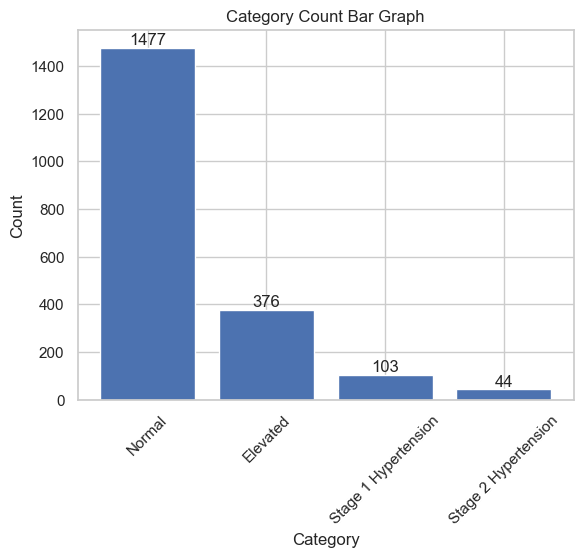

In [30]:
categories = BP['Categorized BP'].value_counts()

# Plot a bar graph
plt.bar(categories.index, categories.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count Bar Graph')

# Loop through each bar in the graph
for i, v in enumerate(categories.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation = 45)
# Show the plot
plt.show()

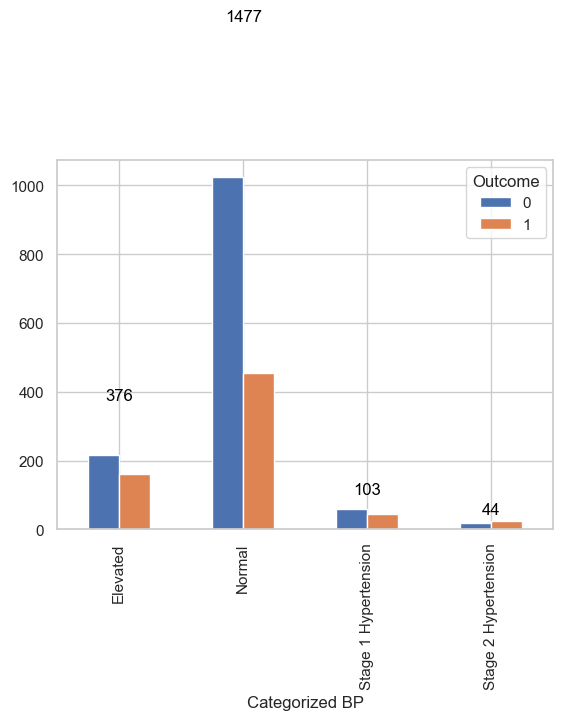

In [31]:
grouped = BP.groupby(['Categorized BP', 'Outcome']).size().reset_index(name='Count')

# Get the count for each group
categories = grouped.pivot_table(index='Categorized BP', columns='Outcome', values='Count', aggfunc='sum')

# Plot the count for each group in a bar graph
ax = categories.plot(kind='bar')

# Add the count label to each bar
for i, v in enumerate(categories.sum(axis=1)):
    ax.text(i, v + 0.5, str(v), color='black', ha='center')

plt.show()

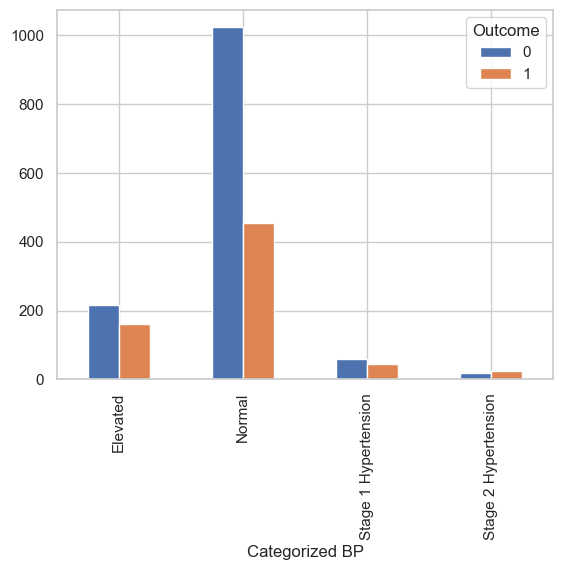

In [32]:
grouped = BP.groupby(['Categorized BP', 'Outcome']).size().reset_index(name='Count')

# Get the count for each group
categories = grouped.pivot_table(index='Categorized BP', columns='Outcome', values='Count', aggfunc='sum')

# Plot the count for each group in a bar graph
fig, ax = plt.subplots()
categories.plot.bar(ax=ax)

plt.show()

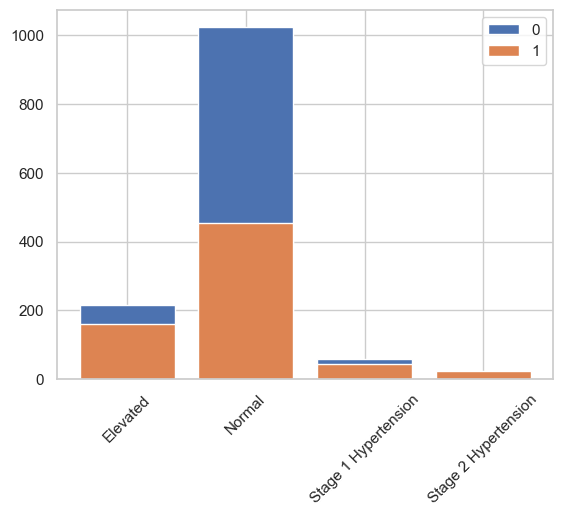

In [33]:
grouped = BP.groupby(['Categorized BP', 'Outcome']).size().reset_index(name='Count')
fig, ax = plt.subplots()
x = grouped['Categorized BP'].unique()
for outcome in [0, 1]:
    y = grouped[grouped['Outcome'] == outcome]['Count']
    ax.bar(x, y, label=outcome)
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [34]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [35]:
def categorize_bmi(df):
    categorized_bmi = []
    for i in df['BMI']:
        if i >= 18.5 and i <=24.9:
            categorized_bmi.append("Normal")
        elif i < 18.5:
            categorized_bmi.append("Under Weight")
        else:
            categorized_bmi.append("Over Weight")
    df['Categorized BMI'] = categorized_bmi
    return df

In [36]:
categorize_bmi(bmi_over)

/var/folders/rn/8fs17gts7cq629d57s177p5w0000gn/T/ipykernel_41427/1618399054.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Categorized BMI'] = categorized_bmi


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Categorized BMI
0,2,138,62,35,0,33.6,0.127,47,1,Over Weight
1,0,84,82,31,125,38.2,0.233,23,0,Over Weight
2,0,145,0,0,0,44.2,0.630,31,1,Over Weight
3,0,135,68,42,250,42.3,0.365,24,1,Over Weight
4,1,139,62,41,480,40.7,0.536,21,0,Over Weight
...,...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0,Over Weight
1996,8,179,72,42,130,32.7,0.719,36,1,Over Weight
1997,6,85,78,0,0,31.2,0.382,42,0,Over Weight
1998,0,129,110,46,130,67.1,0.319,26,1,Over Weight


In [37]:
#lets extract features and targets
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [38]:
#Splitting train test data 70 30 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [39]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1400, 8), (600, 8), (1400,), (600,))


Accuracy: 0.812 ROC AUC: 0.765 Precision: 0.727 Recall: 0.638


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


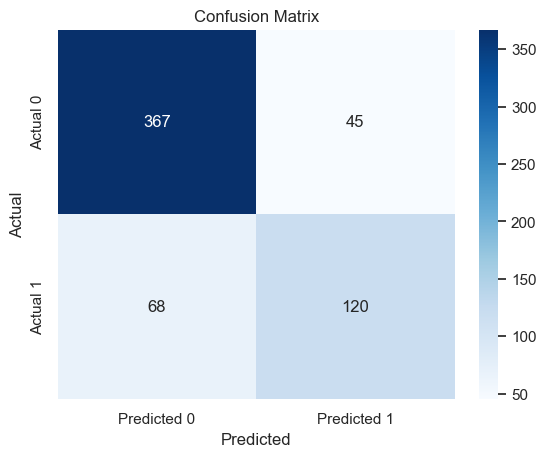

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Sensitivity: 0.638
Specificity: 0.891


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

TP:  [27 23 23 28 31 26 28 22 31 29]
TN:  [82 83 82 82 77 82 75 82 81 77]
FN:  [23 27 27 22 19 24 21 27 18 20]
FP:  [ 8  7  8  8 13  8 16  9 10 14]


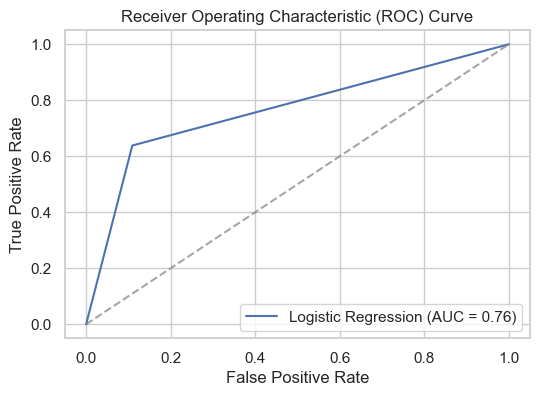

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Train logistic regression classifier and evaluate on test data
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
ac1 = accuracy_score(test_y, y_pred)
rc1 = roc_auc_score(test_y, y_pred)
pr1 = precision_score(test_y, y_pred)
re1 = recall_score(test_y, y_pred)
print(f"\nAccuracy: {ac1:.3f} ROC AUC: {rc1:.3f} Precision: {pr1:.3f} Recall: {re1:.3f}")

# Display confusion matrix as a heatmap
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate sensitivity and specificity from confusion matrix
tn, fp, fn, tp = cm.ravel()
sensitivity1 = tp / (tp + fn)
specificity1 = tn / (tn + fp)
print(f"\nSensitivity: {sensitivity1:.3f}")
print(f"Specificity: {specificity1:.3f}")

# Evaluate model using cross-validation
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
display_result(result)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Accuracy: 0.803 ROC AUC: 0.751 Precision: 0.719 Recall: 0.612


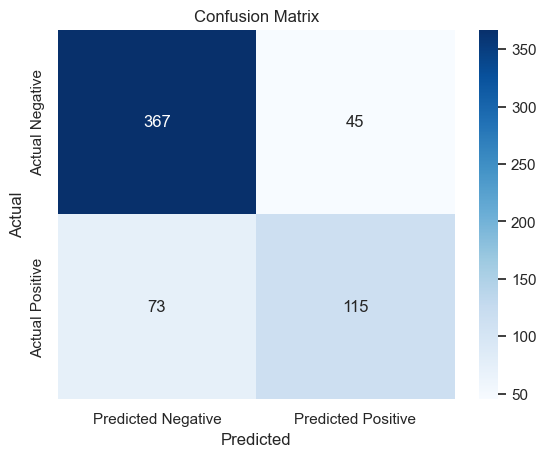


Sensitivity: 0.6117021276595744
Specificity: 0.8907766990291263

Cross-Validation Scores:
fit_time: 4.84 (+/-0.85)
score_time: 0.01 (+/-0.00)
test_accuracy: 0.76 (+/-0.02)
test_precision: 0.72 (+/-0.05)
test_recall: 0.55 (+/-0.06)
test_specificity: 0.88 (+/-0.03)


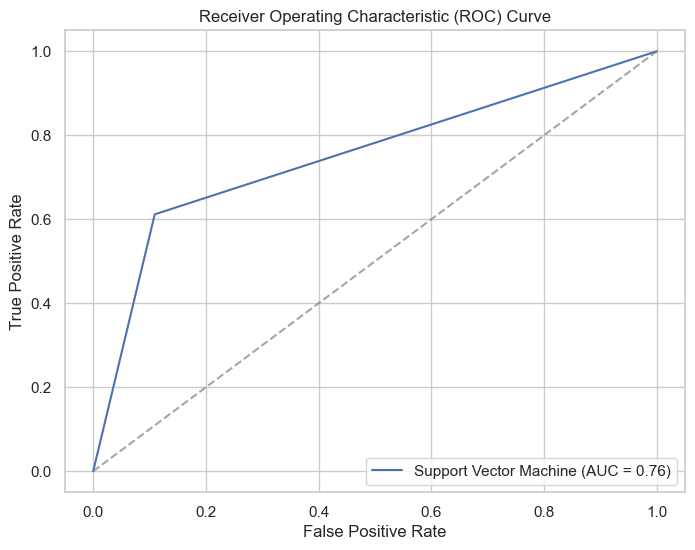

In [99]:
#SVM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

def true_negatives(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def false_positives(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def false_negatives(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def true_positives(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# Define custom scorers based on confusion matrix
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': 'precision',
           'recall': 'recall',
           'specificity': make_scorer(lambda y_true, y_pred: true_negatives(y_true, y_pred) / (true_negatives(y_true, y_pred) + false_positives(y_true, y_pred)))}

# Train a Support Vector Machine classifier
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Compute accuracy and ROC AUC score on test set
ac2 = accuracy_score(test_y, y_pred)
rc2 = roc_auc_score(test_y, y_pred)
pr2 = precision_score(test_y, y_pred)
re2 = recall_score(test_y, y_pred)
print(f"\nAccuracy: {ac2:.3f} ROC AUC: {rc2:.3f} Precision: {pr2:.3f} Recall: {re2:.3f}")

# Compute confusion matrix on test set and display as a DataFrame
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Compute and display sensitivity and specificity based on the confusion matrix
sensitivity2 = true_positives(test_y, y_pred) / (true_positives(test_y, y_pred) + false_negatives(test_y, y_pred))
specificity2 = true_negatives(test_y, y_pred) / (true_negatives(test_y, y_pred) + false_positives(test_y, y_pred))
print("\nSensitivity:", sensitivity2)
print("Specificity:", specificity2)

# Compute cross-validation scores on training set
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)
print("\nCross-Validation Scores:")
for key, value in result.items():
    print(f"{key}: {value.mean():.2f} (+/-{value.std():.2f})")

# Plot ROC curve on test set
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Support Vector Machine (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim


Accuracy: 0.828 ROC AUC: 0.814 Precision: 0.705 Recall: 0.777

Cross Validation Results:
fit_time: 0.00 (+/- 0.01)
score_time: 0.01 (+/- 0.00)
test_accuracy: 0.80 (+/- 0.04)
test_precision: 0.72 (+/- 0.06)
test_recall: 0.73 (+/- 0.10)
test_f1: 0.72 (+/- 0.06)
test_tp: 36.30 (+/- 4.61)
test_tn: 76.20 (+/- 5.34)
test_fp: 14.20 (+/- 5.27)
test_fn: 13.30 (+/- 4.82)


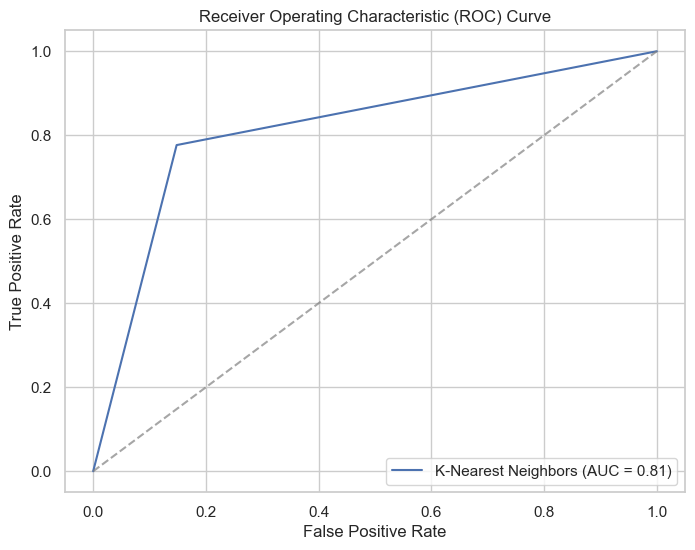


Sensitivity: 0.78, Specificity: 0.85



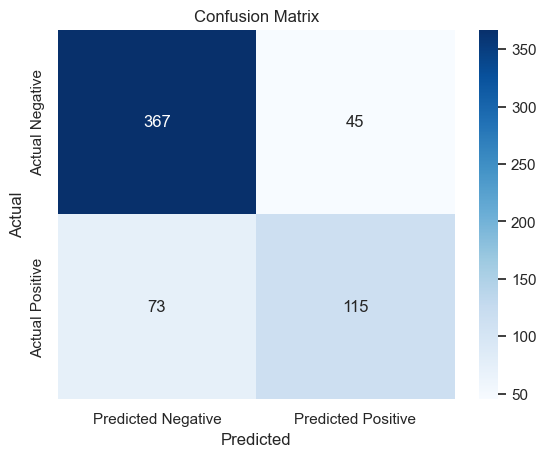

In [100]:
#KNN

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# define scoring metrics for cross-validation
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': 'precision',
           'recall': 'recall', 'f1': 'f1', 'tp': make_scorer(tp),
           'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}

# train and predict using K-NN classifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# find accuracy and ROC_AUC score
ac3 = accuracy_score(test_y, y_pred)
rc3 = roc_auc_score(test_y, y_pred)
pr3 = precision_score(test_y, y_pred)
re3 = recall_score(test_y, y_pred)
print(f"\nAccuracy: {ac3:.3f} ROC AUC: {rc3:.3f} Precision: {pr3:.3f} Recall: {re3:.3f}")


# cross validate with scoring metrics and display the results
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)

# Display the results of cross validation
print("\nCross Validation Results:")
for metric_name, scores in result.items():
    print(f"{metric_name}: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

# plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'K-Nearest Neighbors (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# calculate sensitivity and specificity and display the confusion matrix in a dataframe
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
sensitivity3 = tp / (tp + fn)
specificity3 = tn / (tn + fp)
confusion_matrix_df = pd.DataFrame({'Predicted 0': [tn, fn], 'Predicted 1': [fp, tp]},
                                   index=['Actual 0', 'Actual 1'])
print("\nSensitivity: {0:.2f}, Specificity: {1:.2f}\n".format(sensitivity3, specificity3))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.977 ROC AUC: 0.971 Precision: 0.968 Recall: 0.957


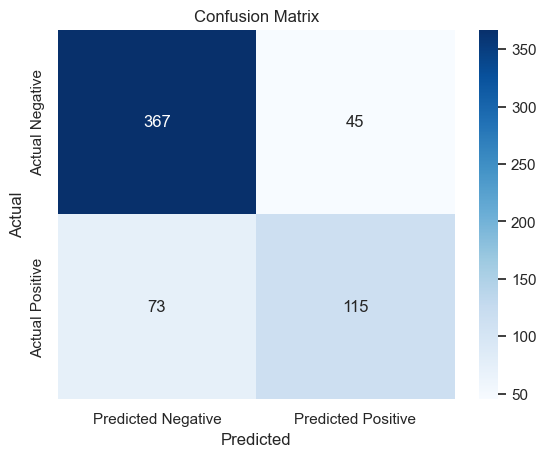


Sensitivity: 0.64
Specificity: 0.89

Cross Validation Results:
fit_time: 0.12 (+/- 0.02)
score_time: 0.01 (+/- 0.00)
test_accuracy: 0.95 (+/- 0.02)
test_precision: 0.93 (+/- 0.02)
test_recall: 0.93 (+/- 0.04)
test_f1: 0.93 (+/- 0.02)
test_tp: 46.00 (+/- 2.14)
test_tn: 86.70 (+/- 1.35)
test_fp: 3.70 (+/- 1.27)
test_fn: 3.60 (+/- 2.15)


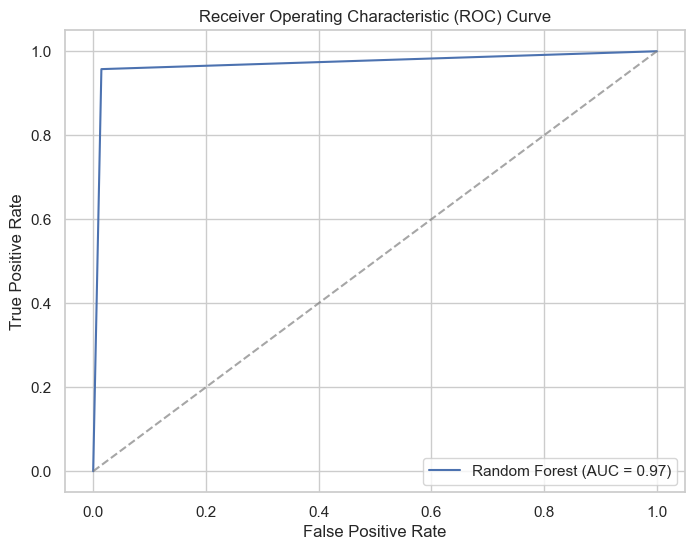

In [101]:
#Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# Define the scoring metrics for cross validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'tp': make_scorer(tp),
           'tn': make_scorer(tn),
           'fp': make_scorer(fp),
           'fn': make_scorer(fn)}

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

# Make predictions on test set
y_pred = clf.predict(test_X)

# Find accuracy and ROC_AUC score
ac4 = accuracy_score(test_y, y_pred)
rc4 = roc_auc_score(test_y, y_pred)
pr4 = precision_score(test_y, y_pred)
re4 = recall_score(test_y, y_pred)
print(f"\nAccuracy: {ac4:.3f} ROC AUC: {rc4:.3f} Precision: {pr4:.3f} Recall: {re4:.3f}")

# Display confusion matrix in a DataFrame
conf_mat = pd.DataFrame(confusion_matrix(test_y, y_pred), 
                         index=['Actual Negative', 'Actual Positive'], 
                         columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
sensitivity4 = tp / (tp + fn)
specificity4 = tn / (tn + fp)
print(f"\nSensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

# Perform cross validation
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)

# Display the results of cross validation
print("\nCross Validation Results:")
for metric_name, scores in result.items():
    print(f"{metric_name}: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.788 ROC AUC: 0.755 Precision: 0.661 Recall: 0.665

Cross Validation Results:
fit_time: 0.00 (+/- 0.00)
score_time: 0.00 (+/- 0.00)
test_tp: 29.30 (+/- 4.27)
test_tn: 74.80 (+/- 3.79)
test_fp: 15.60 (+/- 3.88)
test_fn: 20.30 (+/- 4.34)
Sensitivity: 0.66, Specificity: 0.84


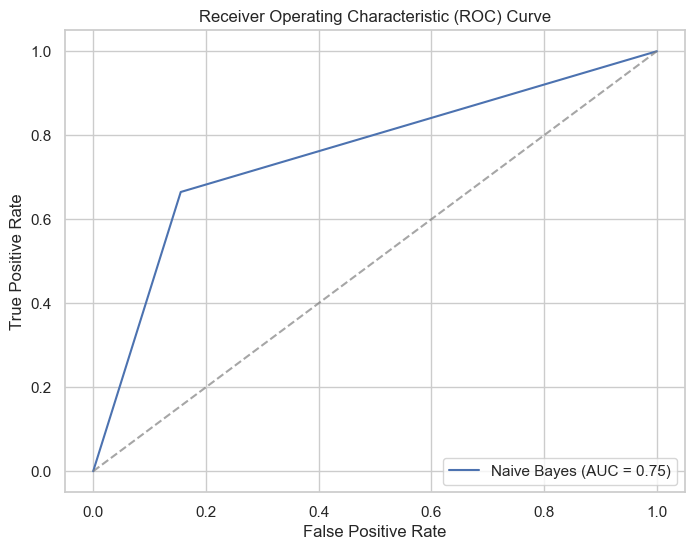

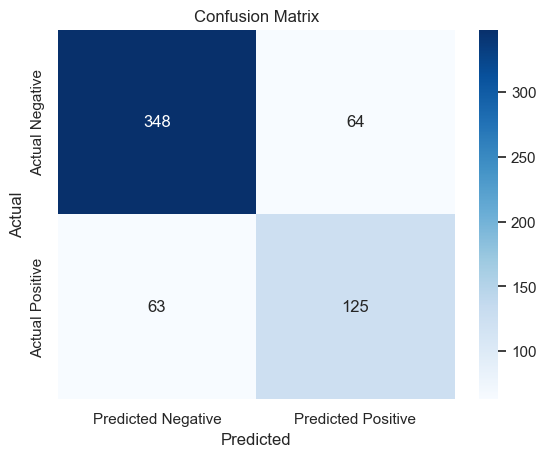

In [102]:
#Naive Bayes
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

# Fit model
clf = GaussianNB()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

# Evaluate model
ac5 = accuracy_score(test_y, y_pred)
rc5 = roc_auc_score(test_y, y_pred)
pr5 = precision_score(test_y, y_pred)
re5 = recall_score(test_y, y_pred)
print(f"\nAccuracy: {ac5:.3f} ROC AUC: {rc5:.3f} Precision: {pr5:.3f} Recall: {re5:.3f}")
result = cross_validate(clf, train_X, train_y, scoring=scoring, cv=10)

# Display the results of cross validation
print("\nCross Validation Results:")
for metric_name, scores in result.items():
    print(f"{metric_name}: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
sensitivity5 = tp / (tp + fn)
specificity5 = tn / (tn + fp)
print(f"Sensitivity: {sensitivity5:.2f}, Specificity: {specificity5:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = roc_auc_score(test_y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', alpha=.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix as dataframe
cm = confusion_matrix(test_y, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

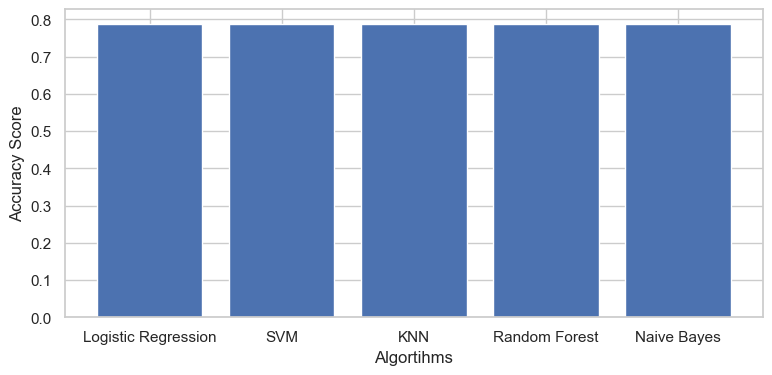

In [103]:
ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naive Bayes'],ac,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

In [104]:
acc_vals = [ac1, ac2, ac3, ac4, ac5]
roc_vals = [rc1,rc2,rc3,rc4,rc5]
pr_vals = [pr1,pr2,pr3,pr4,pr5]
re_vals = [re1,re2,re3,re4,re5]
sen_vals = [sensitivity1,sensitivity2,sensitivity3,sensitivity4,sensitivity5]
spe_vals = [specificity1,specificity2,specificity3,specificity4,specificity5]
all_models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive']
df6 = pd.DataFrame({'Accuracy': acc_vals,'ROC' : roc_vals,'Precision' : pr_vals,'Recall' : re_vals,'Sensitivity' : sen_vals , 'Specificity' : spe_vals},index=
                all_models)
df6.index.name = 'Model'

In [105]:
df6

,Accuracy,ROC,Precision,Recall,Sensitivity,Specificity
Model,,,,,,
Logistic Regression,0.811667,0.764537,0.727273,0.638298,0.638298,0.890777
SVM,0.803333,0.751239,0.718750,0.611702,0.611702,0.890777
KNN,0.828333,0.814269,0.705314,0.776596,0.776596,0.851942
Random Forest,0.976667,0.971442,0.967742,0.957447,0.957447,0.985437
Naive,0.788333,0.754777,0.661376,0.664894,0.664894,0.844660


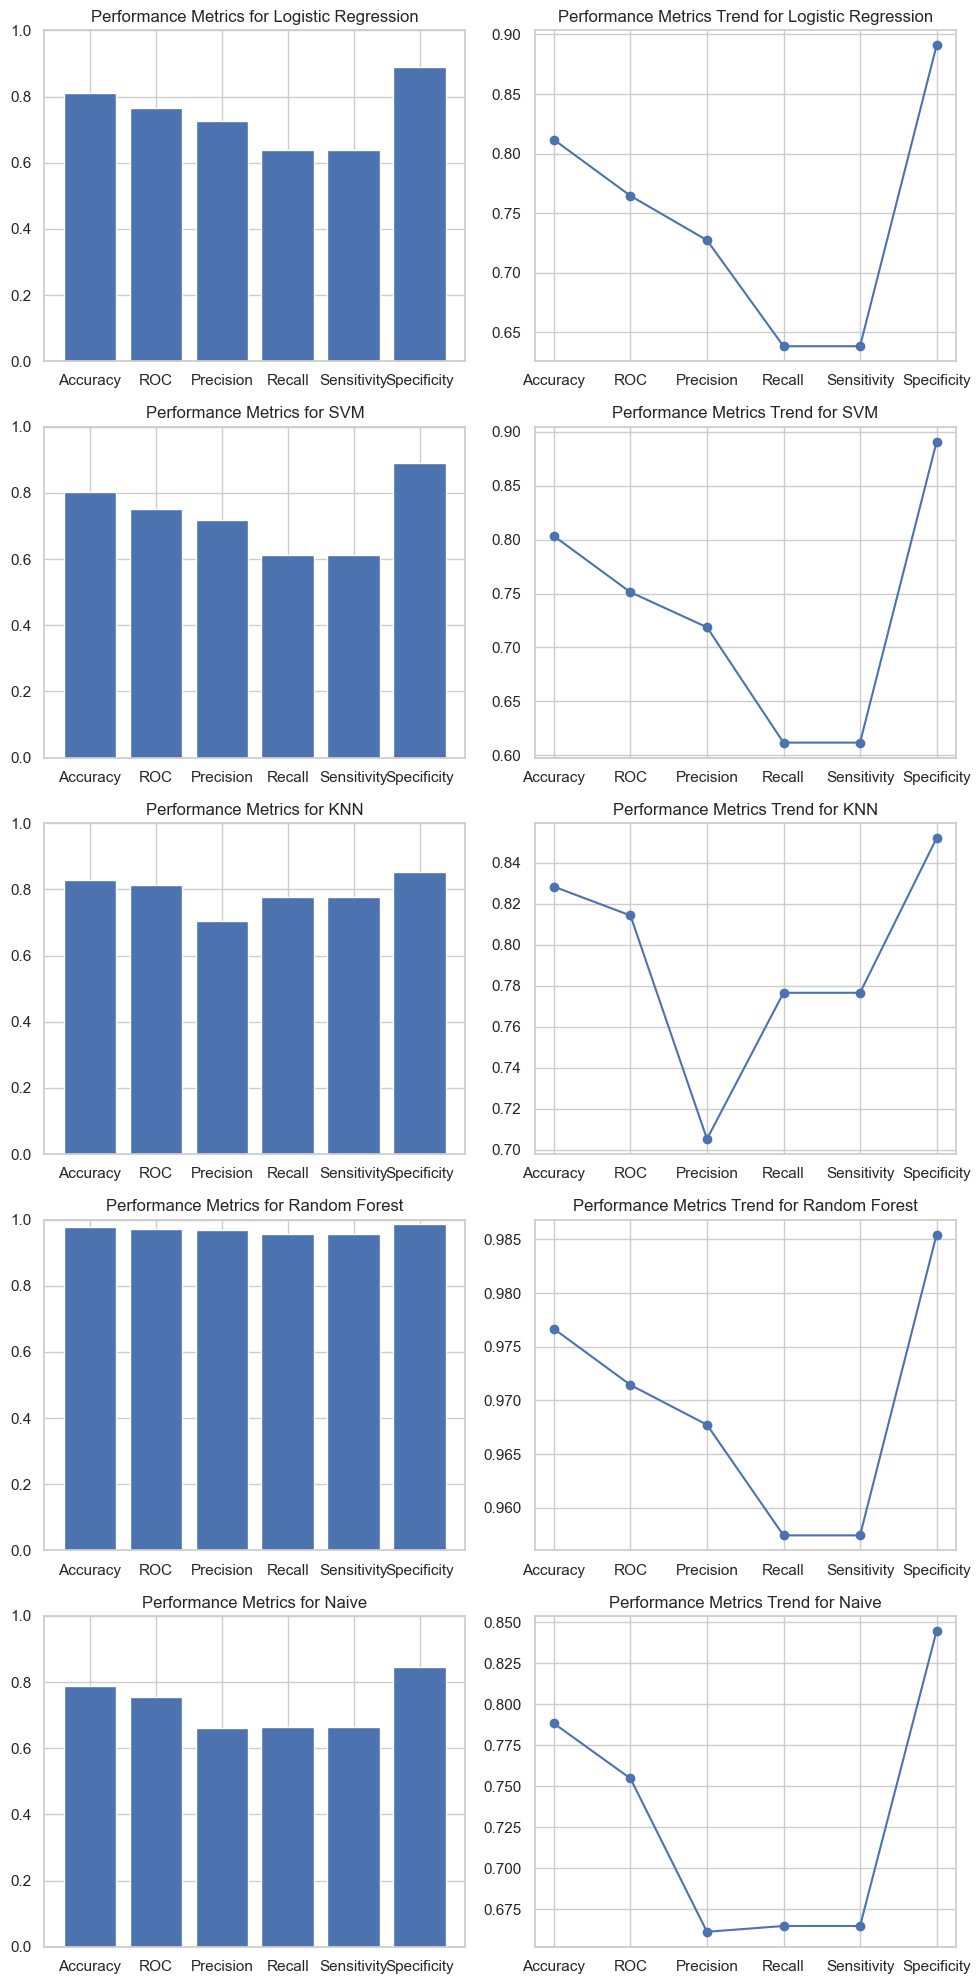

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(df6), ncols=2, figsize=(10, 4*len(df6)))

for i, model in enumerate(df6.index):
    axs[i, 0].bar(['Accuracy', 'ROC','Precision','Recall','Sensitivity','Specificity'], df6.loc[model])
    axs[i, 0].set_title(f'Performance Metrics for {model}')
    axs[i, 0].set_ylim([0, 1])
    axs[i, 1].plot(df6.loc[model], marker='o')
    axs[i, 1].set_title(f'Performance Metrics Trend for {model}')
    axs[i, 1].set_xticks(range(len(df6.columns)))
    axs[i, 1].set_xticklabels(df6.columns)

plt.tight_layout()
plt.show()